In [2]:
# Project Milestone 5
# Lenin Kamma 05/25/2020

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import squarify

In [4]:
# Import finalized saved csv files into a dataframe

In [5]:
county_population = pd.read_csv("C:/Lenin Data Science/DSC540/Project/FinalCountyPopulationData.csv")
case_count = pd.read_csv("C:/Lenin Data Science/DSC540/Project/FinalCaseCountData.csv")
surface_area = pd.read_csv("C:/Lenin Data Science/DSC540/Project/FinalSurfaceArea.csv")
hospital_data = pd.read_csv("C:/Lenin Data Science/DSC540/Project/FinalHospitalData.csv")

In [6]:
# View each dataframe
county_population.head(10)

,Unnamed: 0,state,STATE,COUNTY,estimate_2019,county,Countycode
0,1,Alabama,1,1,55869,Autauga,1001
1,2,Alabama,1,3,223234,Baldwin,1003
2,3,Alabama,1,5,24686,Barbour,1005
3,4,Alabama,1,7,22394,Bibb,1007
4,5,Alabama,1,9,57826,Blount,1009
5,6,Alabama,1,11,10101,Bullock,1011
6,7,Alabama,1,13,19448,Butler,1013
7,8,Alabama,1,15,113605,Calhoun,1015
8,9,Alabama,1,17,33254,Chambers,1017
9,10,Alabama,1,19,26196,Cherokee,1019


In [7]:
# Update the county column  to County and DROP unwanted columns
county_population['County'] = county_population['county'].rename()
county_population.drop(columns=['STATE','COUNTY', 'county','Unnamed: 0' ], inplace=True)
county_population

,state,estimate_2019,Countycode,County
0,Alabama,55869,1001,Autauga
1,Alabama,223234,1003,Baldwin
2,Alabama,24686,1005,Barbour
3,Alabama,22394,1007,Bibb
4,Alabama,57826,1009,Blount
...,...,...,...,...
3137,Wyoming,42343,56037,Sweetwater
3138,Wyoming,23464,56039,Teton
3139,Wyoming,20226,56041,Uinta
3140,Wyoming,7805,56043,Washakie


In [8]:
# View case count dataset
case_count.head(10)

,FIPS_code,Date,US_county,US_state,No_of_cases,No_of_deaths
0,10001,2020-05-21,Kent,Delaware,1281,55
1,10003,2020-05-21,New Castle,Delaware,3053,144
2,10005,2020-05-21,Sussex,Delaware,4006,117
3,1001,2020-05-21,Autauga,Alabama,147,3
4,1003,2020-05-21,Baldwin,Alabama,270,8
5,1005,2020-05-21,Barbour,Alabama,100,1
6,1007,2020-05-21,Bibb,Alabama,52,1
7,1009,2020-05-21,Blount,Alabama,48,1
8,1011,2020-05-21,Bullock,Alabama,71,1
9,1013,2020-05-21,Butler,Alabama,321,11


In [130]:
surface_area.head(10)

,Unnamed: 0,STCOU,LND110210D,Statecode
0,2,1001,594.44,AL
1,3,1003,1589.78,AL
2,4,1005,884.88,AL
3,5,1007,622.58,AL
4,6,1009,644.78,AL
5,7,1011,622.81,AL
6,8,1013,776.83,AL
7,9,1015,605.87,AL
8,10,1017,596.53,AL
9,11,1019,553.70,AL


In [131]:
hospital_data.head(10)

,COUNTYFIPS,BEDS
0,1001,85
1,1003,398
2,1005,74
3,1007,35
4,1009,40
5,1011,61
6,1013,94
7,1015,590
8,1017,115
9,1019,60


In [132]:
pd.to_numeric(hospital_data["COUNTYFIPS"])

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
2502    72113
2503    72125
2504    72127
2505    72145
2506    72153
Name: COUNTYFIPS, Length: 2507, dtype: int64

In [133]:
# Create a dataframe with State, County, County Code (FIPS code), Surface Area and Population
# Drop unwanted columns from the join
df_pop_density = pd.merge(county_population,surface_area, how='left', left_on = 'Countycode', right_on = 'STCOU').drop(columns=
                                ['STCOU','Unnamed: 0'])

In [134]:
df_pop_density

,state,estimate_2019,Countycode,County,LND110210D,Statecode
0,Alabama,55869,1001,Autauga,594.44,AL
1,Alabama,223234,1003,Baldwin,1589.78,AL
2,Alabama,24686,1005,Barbour,884.88,AL
3,Alabama,22394,1007,Bibb,622.58,AL
4,Alabama,57826,1009,Blount,644.78,AL
...,...,...,...,...,...,...
3137,Wyoming,42343,56037,Sweetwater,10426.65,WY
3138,Wyoming,23464,56039,Teton,3995.38,WY
3139,Wyoming,20226,56041,Uinta,2081.26,WY
3140,Wyoming,7805,56043,Washakie,2238.55,WY


In [135]:
# Calculate population density (population per square mile))
df_pop_density['Popdensity'] = df_pop_density['estimate_2019'] /df_pop_density['LND110210D']

In [136]:
# Remove unwanted columns from pop density dataframe
df_pop_density.drop(columns=['state', 'estimate_2019','County','LND110210D'], inplace=True)

In [137]:
# View data
df_pop_density.head(10)

,Countycode,Statecode,Popdensity
0,1001,AL,93.985936
1,1003,AL,140.418171
2,1005,AL,27.897568
3,1007,AL,35.969675
4,1009,AL,89.683303
5,1011,AL,16.218429
6,1013,AL,25.035078
7,1015,AL,187.507221
8,1017,AL,55.745729
9,1019,AL,47.310818


In [138]:
df_pop_density['Countycode']

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3137    56037
3138    56039
3139    56041
3140    56043
3141    56045
Name: Countycode, Length: 3142, dtype: int64

In [139]:
# Merge df_pop_density, hospital_data on county code
df_work = pd.merge(df_pop_density,hospital_data,left_on='Countycode',right_on='COUNTYFIPS')

In [140]:
# Merge df_work with case count dataset on FIPS code(county code)
# drop duplicate columns
df_final_work = pd.merge(df_work,case_count,left_on='Countycode',right_on='FIPS_code').drop(columns=
                                ['COUNTYFIPS','Countycode'])

In [141]:
# This is the final Dataset for Visualizations
df_final_work

,Statecode,Popdensity,BEDS,FIPS_code,Date,US_county,US_state,No_of_cases,No_of_deaths
0,AL,93.985936,85,1001,2020-05-21,Autauga,Alabama,147,3
1,AL,140.418171,398,1003,2020-05-21,Baldwin,Alabama,270,8
2,AL,27.897568,74,1005,2020-05-21,Barbour,Alabama,100,1
3,AL,35.969675,35,1007,2020-05-21,Bibb,Alabama,52,1
4,AL,89.683303,40,1009,2020-05-21,Blount,Alabama,48,1
...,...,...,...,...,...,...,...,...,...
2364,WY,12.078099,88,56033,2020-05-21,Sheridan,Wyoming,16,0
2365,WY,4.061036,115,56037,2020-05-21,Sweetwater,Wyoming,25,0
2366,WY,5.872783,48,56039,2020-05-21,Teton,Wyoming,100,1
2367,WY,9.718152,225,56041,2020-05-21,Uinta,Wyoming,13,0


In [142]:
df_final_work.describe()

,Popdensity,BEDS,FIPS_code,No_of_cases,No_of_deaths
count,2368.000000,2369.000000,2369.000000,2369.000000,2369.000000
mean,260.998342,389.847193,30144.165049,567.322077,30.664415
std,866.936598,1107.779474,15090.079728,2676.871008,156.209071
min,0.214238,4.000000,1001.000000,1.000000,0.000000
25%,24.013802,25.000000,19003.000000,13.000000,0.000000
50%,58.887062,85.000000,29077.000000,51.000000,1.000000
75%,164.338456,270.000000,42121.000000,221.000000,9.000000
max,18808.384894,25613.000000,56043.000000,67551.000000,3114.000000


In [143]:
# Maximum number of deaths in a county is 3114
# Maximum population density is 18808 persons per square mile
# Mean no of cases is 567

In [144]:
# Create a new database covid
conn = sqlite3.connect('covid.db') 
c = conn.cursor()

In [145]:
# Create sql using the dataframe
df_final_work.to_sql("covid_data", conn, if_exists="replace")

In [146]:
# Create a new table in the database
# First drop the table if already exists
conn.execute(
    """
    drop table covid_table
    """)
conn.execute(
    """
    create table covid_table as 
    select * from covid_data
    """)
conn.commit()

In [147]:
# Retrive data from database
with sqlite3.connect("covid.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute("Select * from covid_table")

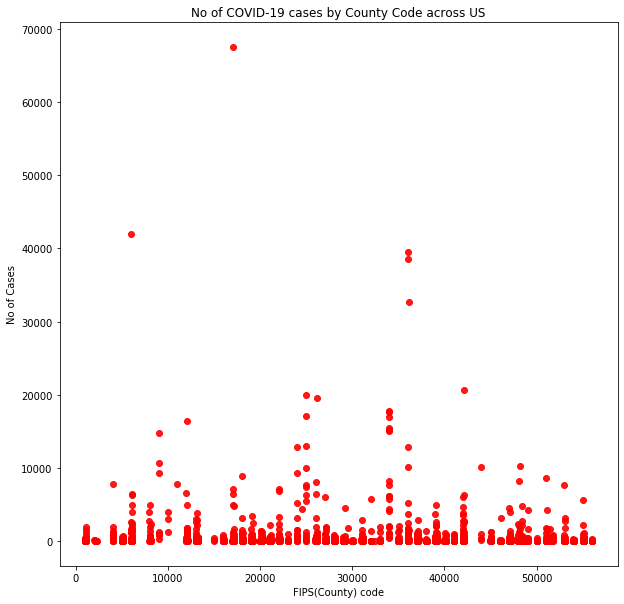

In [172]:
# Draw scatter plot with number of cases on y-axis and county code on x-axi
rng = np.random.RandomState(0)
colors = rng.rand(2369)
sizes = 10000 * rng.rand(2369)
plt.figure(figsize=(10,10))
plt.plot(df_final_work["FIPS_code"], df_final_work["No_of_cases"],'o',color= 'red',alpha=0.9)
plt.xlabel('FIPS(County) code')
plt.ylabel('No of Cases');
plt.title("No of COVID-19 cases by County Code across US")
plt.savefig('C:/Lenin Data Science/DSC540/scatter1.pdf', dpi=1200)
plt.show()

In [149]:
# There is one outlier with number of cases close to 70000
# Most of the counties have covid cases less than 5000

In [150]:
# Let's take top 25 counties from DB
list1 = []
columns = ['County', 'Count', 'Deaths']
with sqlite3.connect("covid.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute("SELECT US_county||'-'||Statecode, No_of_cases,No_of_deaths from covid_table ORDER BY No_of_cases desc LIMIT 25")
    for row in rows:
        list1.append(row)
top25_df = pd.DataFrame(list1, columns=columns)
top25_df = top25_df.sort_values(by='Count')

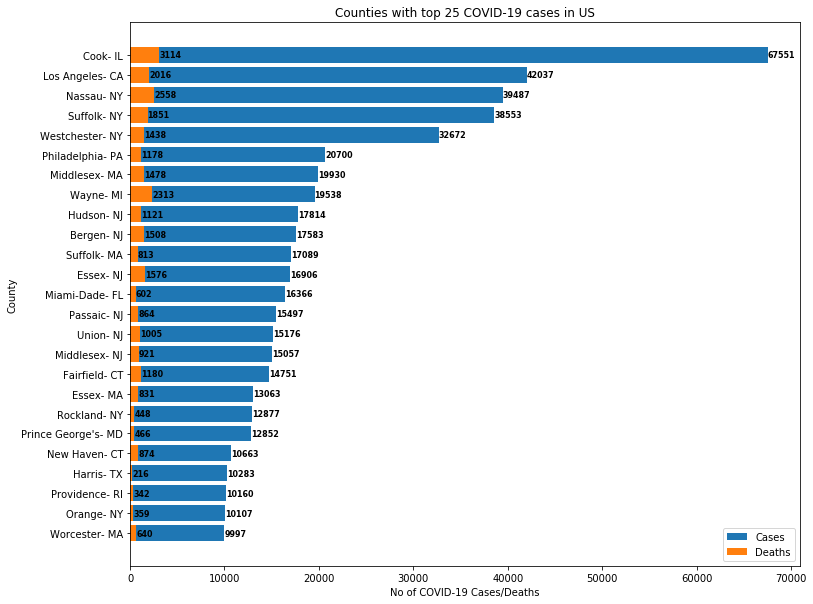

In [169]:
# Draw bar plot with number of cases/Number of deaths on y-axis and county code on x-axis
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(top25_df['County'], top25_df['Count'], align='center')
ax.barh(top25_df['County'], top25_df['Deaths'], align='center')
legend_val = ['Cases', 'Deaths']
plt.xlabel('No of COVID-19 Cases/Deaths')
plt.ylabel('County')
plt.title("Counties with top 25 COVID-19 cases in US")
for i, v in enumerate(top25_df['Count']):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold', fontsize=8, ha='left', va='center')
for i, v in enumerate(top25_df['Deaths']):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold', fontsize=8, ha='left', va='center')
ax.legend(legend_val,loc='best')
plt.savefig('C:/Lenin Data Science/DSC540/bar1.pdf', dpi=1200)
plt.show()

In [152]:
# No. of cases are highest in Cook (IL) county 
# There are 24 counties with more than 10000 cases (as of 05/23/2020)

In [153]:
# Let's take top 25 counties from DB
list1 = []
columns = ['County', 'Popdensity', 'Casecount']
with sqlite3.connect("covid.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute("SELECT US_county||'-'||Statecode, Popdensity, No_of_cases from covid_table ORDER BY No_of_cases desc LIMIT 25")
    for row in rows:
        list1.append(row)
top25_den_df = pd.DataFrame(list1, columns=columns)
top25_den_df

,County,Popdensity,Casecount
0,Cook- IL,5448.079507,67551
1,Los Angeles- CA,2473.978284,42037
2,Nassau- NY,4765.819050,39487
3,Suffolk- NY,1618.991283,38553
4,Westchester- NY,2247.400697,32672
5,Philadelphia- PA,11812.557793,20700
6,Middlesex- MA,1970.725832,19930
7,Wayne- MI,2858.029996,19538
8,Hudson- NJ,14557.068630,17814
9,Bergen- NJ,4000.695249,17583


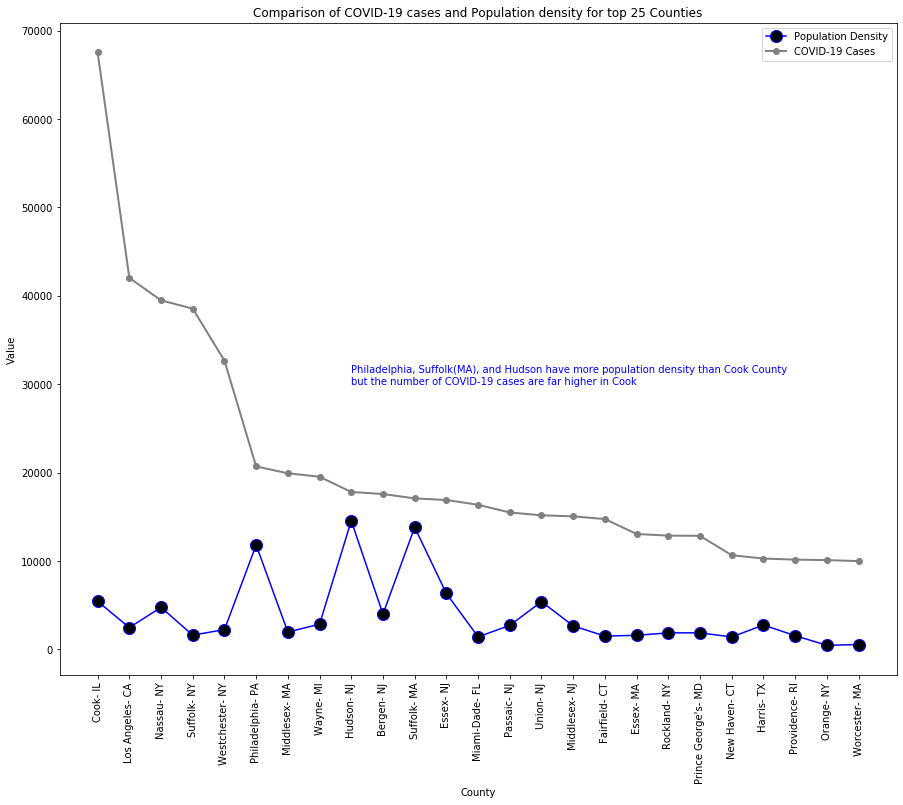

In [168]:
# Compare number of cases with population density
fig, ax = plt.subplots(figsize=(15,12))
plt.plot(top25_den_df['County'], top25_den_df['Popdensity'], marker='o', markerfacecolor='black', markersize=12, color='blue', label="Population Density")
plt.plot(top25_death_df['County'], top25_death_df['Casecount'], marker='o', color='gray', linewidth=2, label="COVID-19 Cases")
plt.xlabel('County')
plt.xticks(rotation=90)
plt.ylabel('Value');
plt.title("Comparison of COVID-19 cases and Population density for top 25 Counties")
plt.text(8,30000,'Philadelphia, Suffolk(MA), and Hudson have more population density than Cook County\nbut the number of COVID-19 cases are far higher in Cook'
        ,color='blue')
plt.legend()
plt.savefig('C:/Lenin Data Science/DSC540/line1.pdf', dpi=1200)
plt.show()

In [155]:
# Top 25 counties with highest cases
list3 = []
columns = ['County','Casecount', 'Beds']
with sqlite3.connect("covid.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute("SELECT US_county||'-'||Statecode, No_of_cases, BEDS from covid_table ORDER BY No_of_cases desc LIMIT 25")
    for row in rows:
        list3.append(row)
top25_beds_df = pd.DataFrame(list3, columns=columns)
top25_beds_df = top25_beds_df.dropna()
top25_beds_df

,County,Casecount,Beds
0,Cook- IL,67551,16865
1,Los Angeles- CA,42037,25613
2,Nassau- NY,39487,4181
3,Suffolk- NY,38553,3277
4,Westchester- NY,32672,3235
5,Philadelphia- PA,20700,8044
6,Middlesex- MA,19930,3961
7,Wayne- MI,19538,5736
8,Hudson- NJ,17814,1878
9,Bergen- NJ,17583,3019


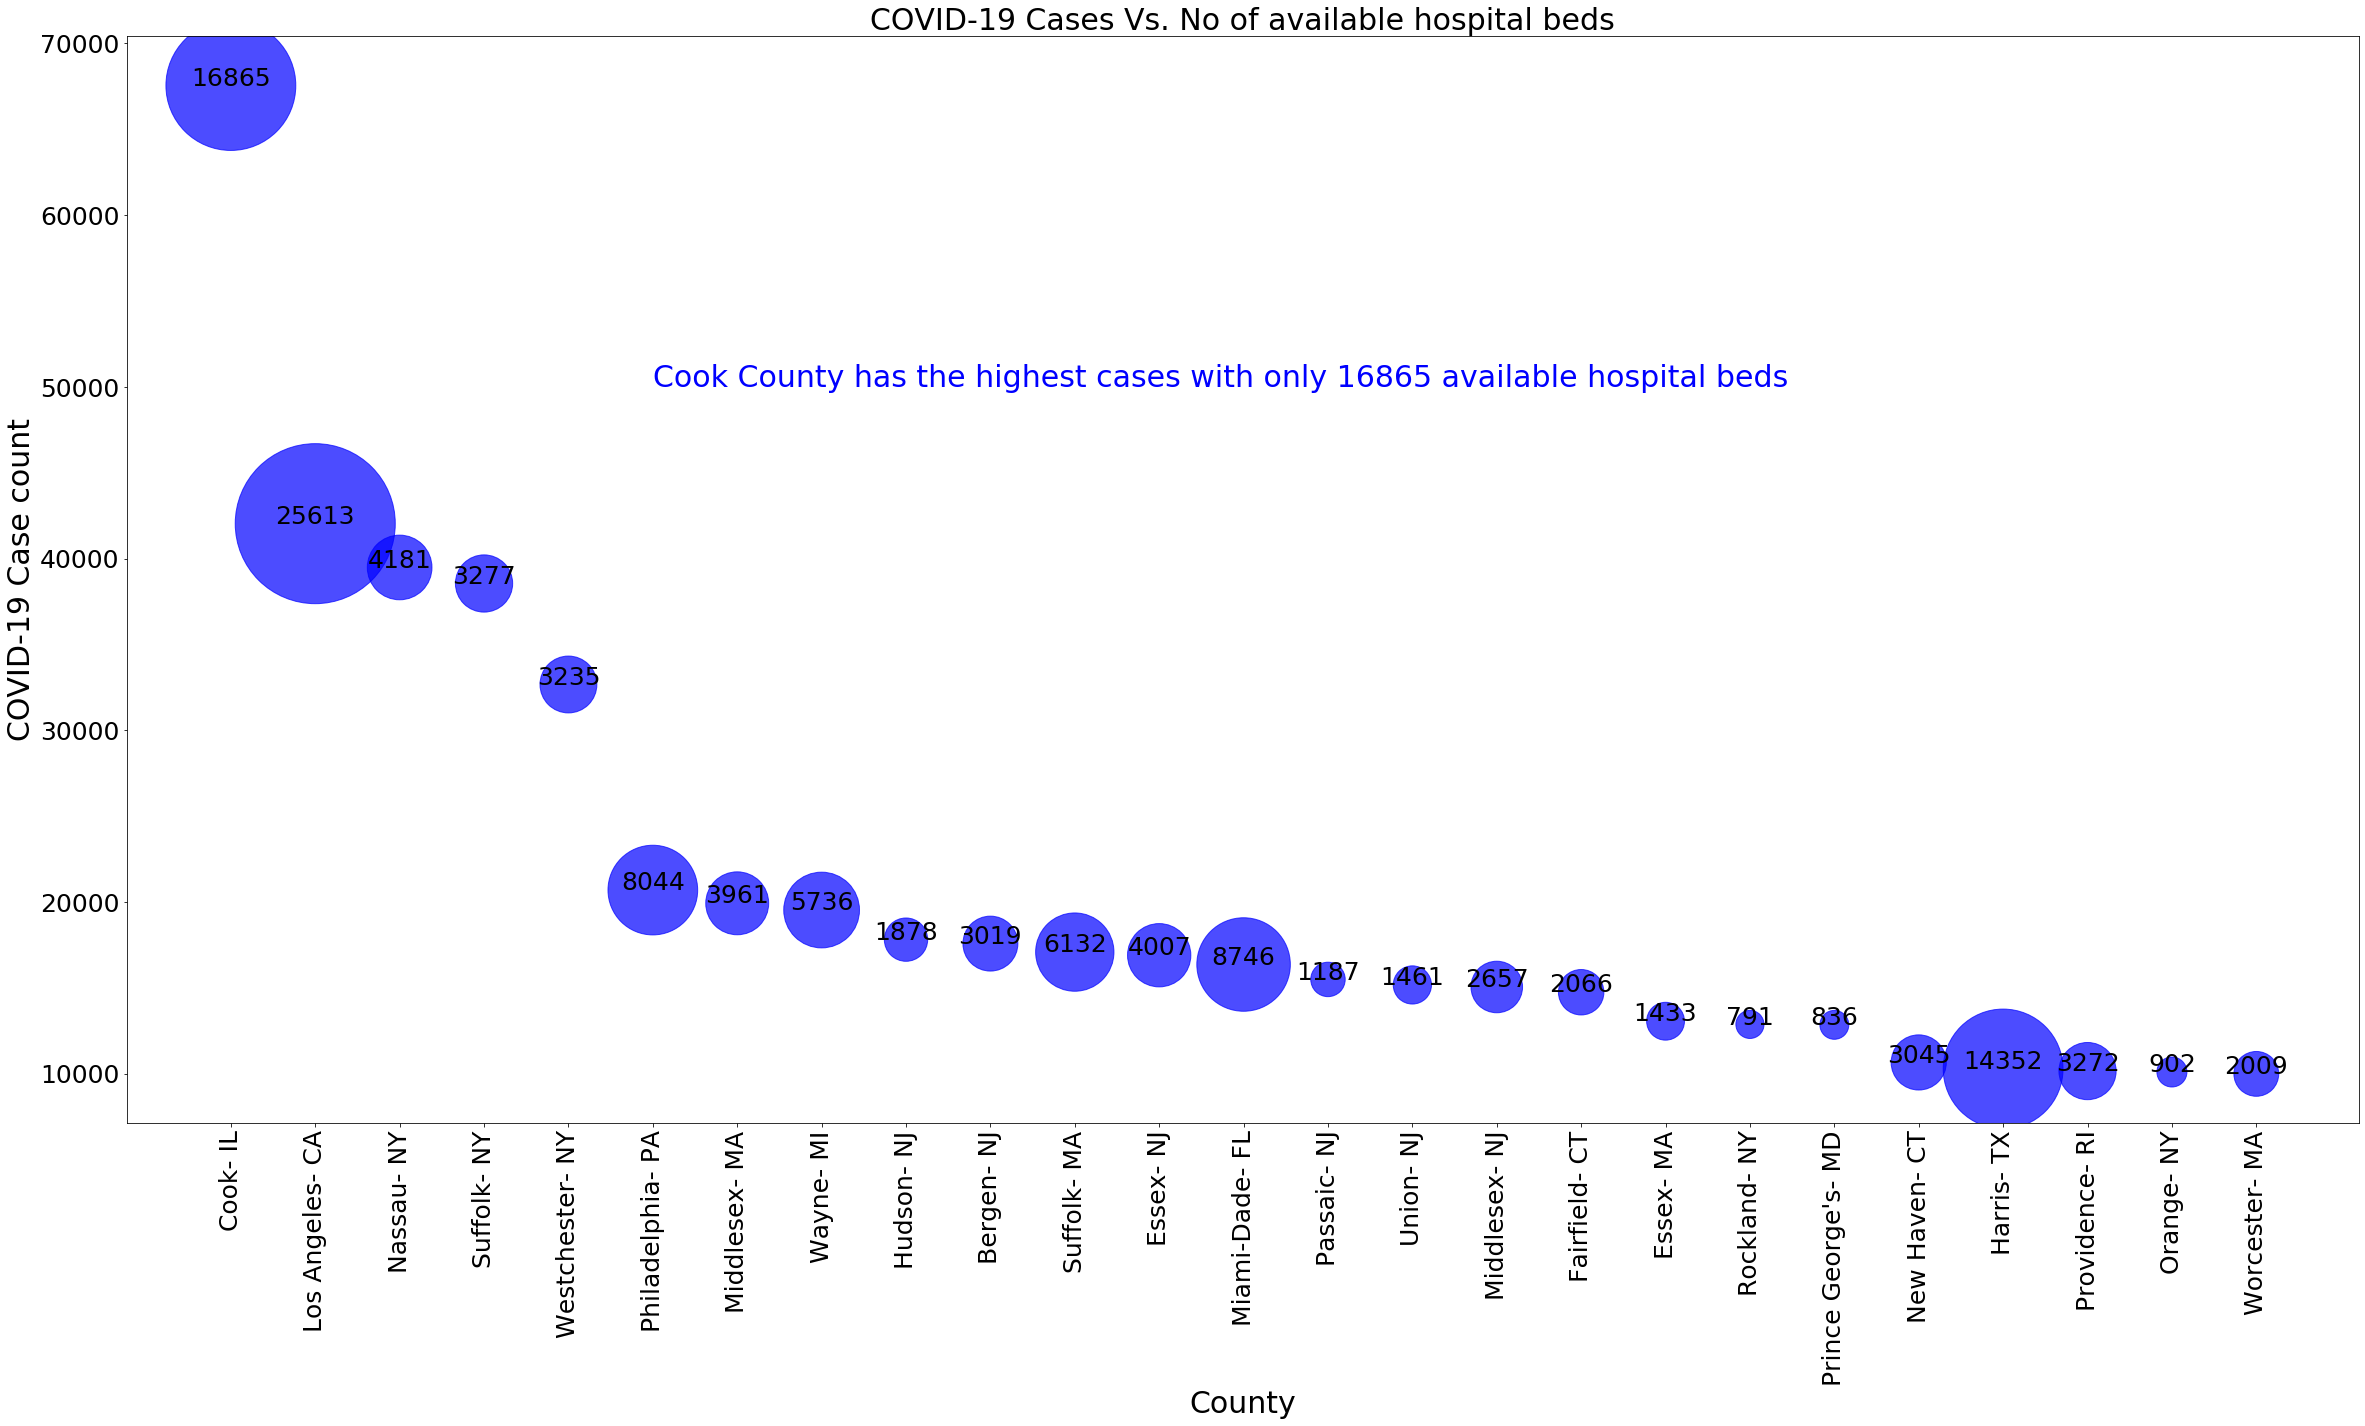

In [171]:
# Create a bubble plot with number of Cases and Beds
fig = plt.figure(figsize=(40,20))
area1 = (top25_beds_df['Beds'])

# Choose random colors
colors1=np.random.rand(15)

# Scatter plot and labels
plt.scatter(top25_beds_df['County'], top25_beds_df['Casecount'],s=area1,color='blue', alpha=0.7)
plt.title('COVID-19 Cases Vs. No of available hospital beds', fontsize=30 )
plt.xlabel('County', fontsize=30)
plt.ylabel('COVID-19 Case count', fontsize=30)

x , y = top25_beds_df['County'], top25_beds_df['Casecount']
for i, txt in enumerate(top25_beds_df['Beds']):
    plt.annotate(txt, (x[i], y[i]), fontsize=25, horizontalalignment='center')


# Rotate xticks to show vertical
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.text(5,50000,'Cook County has the highest cases with only 16865 available hospital beds', color='blue', fontsize=30)
plt.savefig('C:/Lenin Data Science/DSC540/bubble1.pdf', dpi=2400)
plt.show()

In [160]:
# Top 25 counties with highest cases
list4 = []
columns = ['County','Casecount', 'Popdensity']
with sqlite3.connect("covid.db") as conn:
    cursor = conn.cursor()
    rows = cursor.execute("SELECT US_county||'-'||Statecode, No_of_cases, popdensity from covid_table ORDER BY No_of_cases DESC LIMIT 50")
    for row in rows:
        list4.append(row)
top50_pop_df = pd.DataFrame(list4, columns=columns)
top50_pop_df = top50_pop_df.dropna()
top50_pop_df

,County,Casecount,Popdensity
0,Cook- IL,67551,5448.079507
1,Los Angeles- CA,42037,2473.978284
2,Nassau- NY,39487,4765.819050
3,Suffolk- NY,38553,1618.991283
4,Westchester- NY,32672,2247.400697
5,Philadelphia- PA,20700,11812.557793
6,Middlesex- MA,19930,1970.725832
7,Wayne- MI,19538,2858.029996
8,Hudson- NJ,17814,14557.068630
9,Bergen- NJ,17583,4000.695249


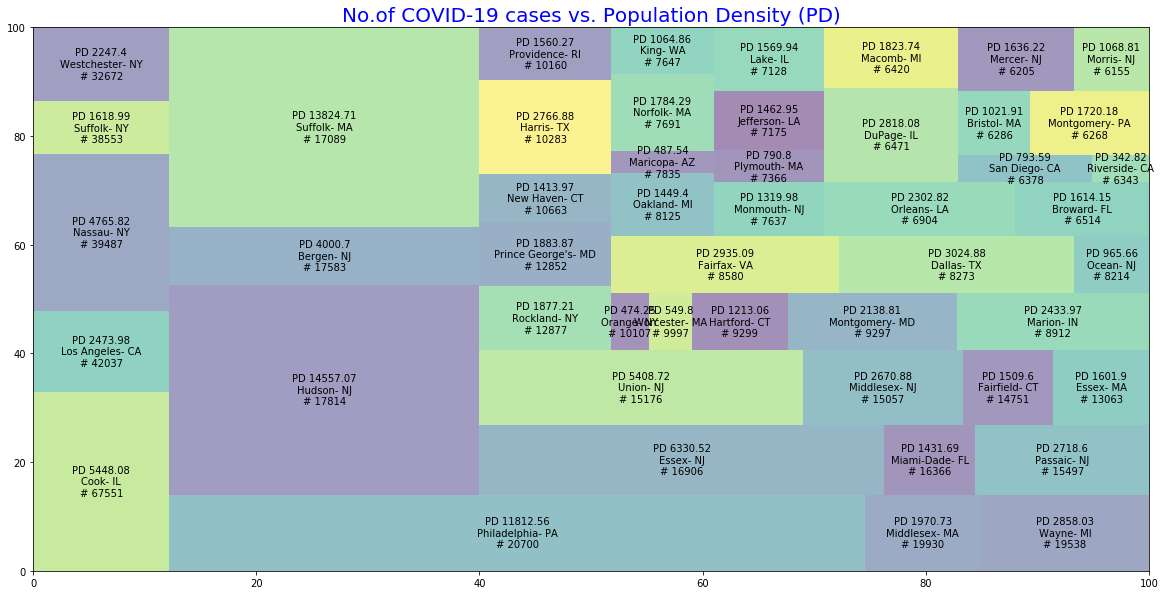

In [167]:
# Create a label to show on tree map
top50_pop_df['label1'] = "PD " + round(top50_pop_df["Popdensity"],2).astype(str) +'\n'+ top50_pop_df["County"].astype(str) +'\n' + "# " + top50_pop_df["Casecount"].astype(str)

# Create tree map
plt.figure(figsize=(20,10))
squarify.plot(sizes=top50_pop_df['Popdensity'],label=top50_pop_df["label1"], alpha=0.5 )
plt.title("No.of COVID-19 cases vs. Population Density (PD)", fontsize=20, color="blue")
plt.savefig('C:/Lenin Data Science/DSC540/tree1.pdf', dpi=1200)
plt.show()


In [162]:
# Save final data file to the local drive
#Save final dataset to a csv file
df_final_work.to_csv(r'C:/Lenin Data Science/DSC540/Project/FinalDataFile.csv')